# a. Read a matrix A from a csv file and a vector b from another        csv file









In [2]:
import numpy as np
import pandas as pd
from scipy.linalg import lu
import matplotlib.pyplot as plt

In [55]:
csvdata1 = pd.read_csv('C:/Users/annuk/.vscode/Desktop/python/matrix.csv', header=None)
M=csvdata1.to_numpy()
print('A =')
print(M)

A =
[[ 4 -2 -3  1]
 [ 1  3  1  3]
 [ 1  2 -1 -2]
 [ 2  1 -1 -1]]


Here, we read a matrix A from csv i.e csvdata1 

In [6]:
csvdata2 = pd.read_csv('C:/Users/annuk/.vscode/Desktop/python/vector.csv', header=None)
Vector=csvdata2.to_numpy()
print('b =')
print(Vector)

b =
[[20]
 [14]
 [ 3]
 [ 9]]


Here, we read vector b from another csv i.e csvdata2

# b. Perform LU decomposition for square matrix

LU decomposition of a matrix is the factorization of a given square matrix into two triangular matrices, one upper triangular matrix and one lower triangular matrix, such that the product of these two matrices gives the original matrix. 
Here,
In LU decomposition of a matrix A, we want to do
A=PLU
Where, A= Given square matrix 
       P= Permutation matrix
       L= Lower triangular matrix
       U= Upper triangular matrix

In [56]:
print("A =")
print(M)


A =
[[ 4 -2 -3  1]
 [ 1  3  1  3]
 [ 1  2 -1 -2]
 [ 2  1 -1 -1]]


In [57]:
P, L, U = lu(M)

The Scipy library holds many packages available to help in scientific computing. One such built-in package is linalg. Linalg enables solving linear algebra routines very quickly. One such linear algebra function is solving LU. It can easily be computed using lu() method. This method automatically computes P,L and U.

In [58]:
print('The P Matrix is :')
print(P)
print()
print('The L Matrix is :')
print(L)
print()
print('The U Matrix is :')
print(U)

The P Matrix is :
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

The L Matrix is :
[[1.         0.         0.         0.        ]
 [0.25       1.         0.         0.        ]
 [0.25       0.71428571 1.         0.        ]
 [0.5        0.57142857 0.33333333 1.        ]]

The U Matrix is :
[[ 4.         -2.         -3.          1.        ]
 [ 0.          3.5         1.75        2.75      ]
 [ 0.          0.         -1.5        -4.21428571]
 [ 0.          0.          0.         -1.66666667]]


Now, we want to check A=PLU

In [60]:
k=np.allclose(P@(L@U), M)
print(k)

True


# c. Solve the equation AX=b and check whether there are 0, 1 or infinitely many solutions

We will start with a system of linera equation in matrix from (AX=b). As we take an example, 
4a-2b-3c+d= 20
a+3b+c+3d= 14
a+2b-c-2d= 3
2a+b-c-d= 9

In [61]:
print('A=')
print(M)
print('b=')
print(b)

A=
[[ 4 -2 -3  1]
 [ 1  3  1  3]
 [ 1  2 -1 -2]
 [ 2  1 -1 -1]]
b=
[[20]
 [14]
 [ 3]
 [ 9]]


In [62]:
X=np.linalg.solve(M, b)

The numpy.linalg.solve() function solve a linear matrix equation, or system of linear scalar equation. Computes the "exact" solution, X, of the well-determined, i.e., full rank, linear matrix equation AX=b

In [63]:
print('X=', X)

X= [[ 5.]
 [ 1.]
 [-0.]
 [ 2.]]


In [66]:
MX=np.matmul(M, X)

The numpy.matmul() function returns the matrix product of two arrays.

In [67]:
q=np.allclose(MX, b)
print(q)

True


Thus, our solution for X verified

# d. Do the diagonalization of matrix (assume it is symmetric) 

All symmetric matrices are orthogonally diagonalizable. That is, if the eigenvectors are formed as the columns of a matrix and the columns are normalized, then the matrix is isometric, or orthogonal.

In [68]:
from   numpy.linalg import inv, matrix_power as pow
A = np.array([[2,-5,-4],[-5,3,-5],[-4,-5,2]])
print("Given matrix \n A= ")
print(A)

Given matrix 
 A= 
[[ 2 -5 -4]
 [-5  3 -5]
 [-4 -5  2]]


Now, we have to find the eigenvalues and the corresponding eigenvectors.


In [35]:
e, U = np.linalg.eig( A )
D = np.diag( e )
print( "A diagonal matrix with the eigenvalues on the diagonal" )
print( "D =" )
print( D )
print( "A matrix where the columns are normalized eigenvectors" )
print( "U =" )
print( U )

A diagonal matrix with the eigenvalues on the diagonal
D =
[[-7.  0.  0.]
 [ 0.  6.  0.]
 [ 0.  0.  8.]]
A matrix where the columns arenormalized eigenvectors
U =
[[ 5.77350269e-01  7.07106781e-01  4.08248290e-01]
 [ 5.77350269e-01 -4.45537400e-17 -8.16496581e-01]
 [ 5.77350269e-01 -7.07106781e-01  4.08248290e-01]]


The np.linalg.eig() function compute the eigenvalues and right eigenvectors of a square array.
The np.diag() function extract a diagonal or construct a diagonal array.
There will be three eigenvalues,so 'e' is a 1-d array of length three containing the three   eigenvalues. 

In [41]:
print( "UT  =" )
print( U.T )
print( "Uinv   =" )
print( inv( U ) )
print()
print( "UDUT  =" )
print( U@D@(U.T) )
z=U@D@(U.T)

UT  =
[[ 5.77350269e-01  5.77350269e-01  5.77350269e-01]
 [ 7.07106781e-01 -4.45537400e-17 -7.07106781e-01]
 [ 4.08248290e-01 -8.16496581e-01  4.08248290e-01]]
Uinv   =
[[ 5.77350269e-01  5.77350269e-01  5.77350269e-01]
 [ 7.07106781e-01 -2.56395025e-16 -7.07106781e-01]
 [ 4.08248290e-01 -8.16496581e-01  4.08248290e-01]]

UDUT  =
[[ 2. -5. -4.]
 [-5.  3. -5.]
 [-4. -5.  2.]]


In [42]:
print(np.allclose(z, A))

True


It is concluded that A = UDUT, where U is orthogonal  and D is diagonal.

In [46]:
for k in range( 0, 3 ):
  u = U[:,k]
  print()
  print( "Eigenvalue and vector")
  print(k)
  print()
  print( "Eigenvalue: ")
  print(e[k])
  print()
  print( "Eigenvector:")
  print(u)
  print()
  print( "Au =")
  print(A@u)
  print()
  print( e[k], "u =", e[k]*u )

  


Eigenvalue and vector
0

Eigenvalue: 
-7.000000000000001

Eigenvector:
[0.57735027 0.57735027 0.57735027]

Au =
[-4.04145188 -4.04145188 -4.04145188]

-7.000000000000001 u = [-4.04145188 -4.04145188 -4.04145188]

Eigenvalue and vector
1

Eigenvalue: 
6.000000000000006

Eigenvector:
[ 7.07106781e-01 -4.45537400e-17 -7.07106781e-01]

Au =
[ 4.24264069e+00  5.55111512e-16 -4.24264069e+00]

6.000000000000006 u = [ 4.24264069e+00 -2.67322440e-16 -4.24264069e+00]

Eigenvalue and vector
2

Eigenvalue: 
8.000000000000002

Eigenvector:
[ 0.40824829 -0.81649658  0.40824829]

Au =
[ 3.26598632 -6.53197265  3.26598632]

8.000000000000002 u = [ 3.26598632 -6.53197265  3.26598632]


# e. Give exponential, sine and sigmoid function on A

Exponential Function on A : 
[[5.45981500e+01 1.35335283e-01 4.97870684e-02 2.71828183e+00]
 [2.71828183e+00 2.00855369e+01 2.71828183e+00 2.00855369e+01]
 [2.71828183e+00 7.38905610e+00 3.67879441e-01 1.35335283e-01]
 [7.38905610e+00 2.71828183e+00 3.67879441e-01 3.67879441e-01]]


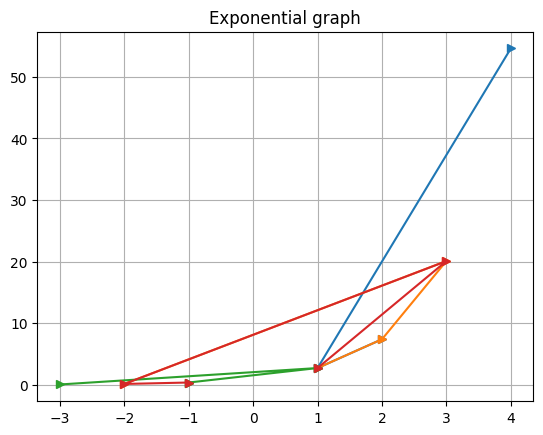

In [71]:
def exponenstial(x):
    return np.exp(x)
        
e=[exponenstial(i) for i in M]
print("Exponential Function on A : ")  
print(np.array(e))  
ee=np.array(e)
plt.plot(M, ee, marker=">")
plt.title("Exponential graph")
plt.grid()
plt.show() 

The np.exp() mathematical function helps to calculate exponential of all the elements in the input array.
The plot() function is used to draw points (markers) in a diagram.

Sin Function on A : 
[[-0.7568025  -0.90929743 -0.14112001  0.84147098]
 [ 0.84147098  0.14112001  0.84147098  0.14112001]
 [ 0.84147098  0.90929743 -0.84147098 -0.90929743]
 [ 0.90929743  0.84147098 -0.84147098 -0.84147098]]


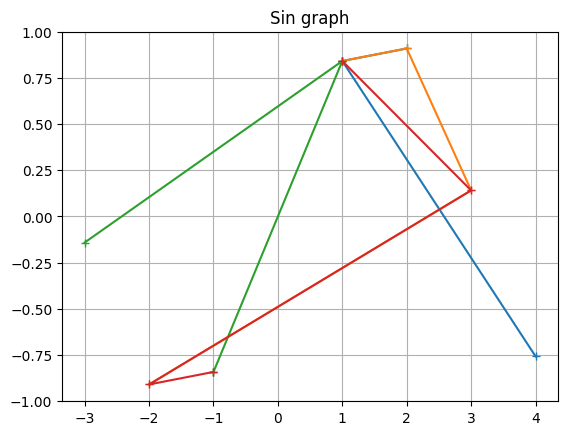

In [74]:
def sinfun(x):
    return np.sin(x)
s=[sinfun(i) for i in M]
print("Sin Function on A : ")  
print(np.array(s))  
ss=np.array(s)
plt.plot(M, ss, marker="+")
plt.title("Sin graph")
plt.grid()
plt.show()

The np.sin() function help to find sine value of the angle in degree and radian.

Sigmoid Function on A : 
[[0.98201379 0.11920292 0.04742587 0.73105858]
 [0.73105858 0.95257413 0.73105858 0.95257413]
 [0.73105858 0.88079708 0.26894142 0.11920292]
 [0.88079708 0.73105858 0.26894142 0.26894142]]


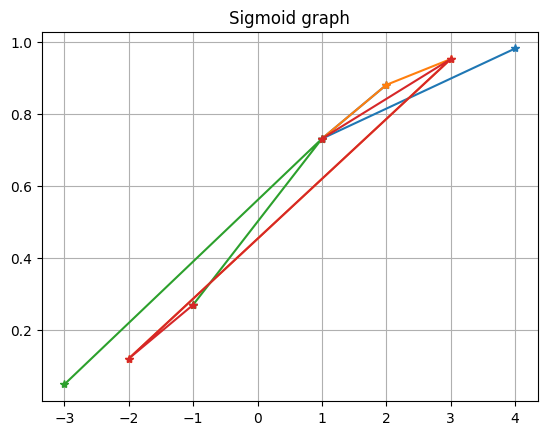

In [84]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))
sig=[sigmoid(i) for i in M]
print("Sigmoid Function on A : ")  
print(np.array(sig))  
sigg=np.array(sig)
plt.plot(M, sigg, marker="*")
plt.title("Sigmoid graph")
plt.grid()
plt.show() 


# f. Find all the eigenpairs of A

In [83]:
print('A =')
print(M)
e, ev=np.linalg.eig(M)
print()
print("Eigen Values are : ")
print(e)
print()
print("Eigen Vectors are : ")
print(ev)

A =
[[ 4 -2 -3  1]
 [ 1  3  1  3]
 [ 1  2 -1 -2]
 [ 2  1 -1 -1]]

Eigen Values are : 
[ 4.21878093+2.15573221j  4.21878093-2.15573221j -2.89982325+0.j
 -0.53773861+0.j        ]

Eigen Vectors are : 
[[ 0.72219808+0.j          0.72219808-0.j         -0.16630017+0.j
  -0.4857832 +0.j        ]
 [ 0.02834461-0.61239229j  0.02834461+0.61239229j  0.38829523+0.j
   0.22454079+0.j        ]
 [-0.00115756-0.16815119j -0.00115756+0.16815119j -0.78966697+0.j
  -0.82688998+0.j        ]
 [ 0.21121971-0.17237249j  0.21121971+0.17237249j -0.44496869+0.j
   0.17276885+0.j        ]]
